# Basic Imports and Sanity Checks

In [1]:
import sys
sys.executable

'C:\\Users\\mathe\\anaconda3\\envs\\deepchef\\python.exe'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
# This allows scrolling through all the columns. Useful for dataframes with too many columns.
pd.set_option('display.max_columns', 100)

In [4]:
recipes = pd.read_parquet('BasicCleanData.parquet')

In [5]:
recipes.sample(2)

,RecipeId,AuthorId,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions,url,YearPublished,MonthPublished,DayPublished,HourPublished,TotalMinutes,CorrectAggregatedRating
465117,482266.0,296809,"On the same dy I signed up for ZWT-8, I stumbl...",Vegetables,"[Meat, Indian, Savory, < 60 Mins]","[2, 1⁄4, 1⁄4, 8, 1⁄4, 2, 1, 3, 2, 1, 1⁄4]","[black-eyed peas, chorizo sausage, onion, garl...",1.0,196.7,18.5,4.8,19.0,154.2,4.8,0.9,0.9,4.2,6.0,1/3 Cup Servings,[Heat med-sized sauce pot on med-high heat. Ad...,https://www.food.com/recipe/Black-Eyed-Pea-&am...,2012,7,5,12,35,4.0
148477,155651.0,191015,Make and share this Almond Biscotti recipe fro...,Desserts,"[Cookie & Brownie, European, < 4 Hours]","[1⁄2, 1⁄2, 1, 2, 1, 4, 1⁄2, 1⁄4, 1, 1]","[butter, olive oil, brown sugar, eggs, flour, ...",1.0,216.7,11.2,3.4,27.8,87.7,25.8,1.1,9.2,3.7,NaN,24 cookies,"[Pre-heat oven to 350 degrees., Cream together...",https://www.food.com/recipe/Almond-Biscotti-15...,2006,2,11,19,75,5.0


In [6]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522512 entries, 0 to 522516
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    522512 non-null  float64
 1   AuthorId                    522512 non-null  int32  
 2   Description                 522512 non-null  object 
 3   RecipeCategory              522512 non-null  object 
 4   Keywords                    522512 non-null  object 
 5   RecipeIngredientQuantities  522512 non-null  object 
 6   RecipeIngredientParts       522512 non-null  object 
 7   ReviewCount                 275025 non-null  float64
 8   Calories                    522512 non-null  float64
 9   FatContent                  522512 non-null  float64
 10  SaturatedFatContent         522512 non-null  float64
 11  CholesterolContent          522512 non-null  float64
 12  SodiumContent               522512 non-null  float64
 13  CarbohydrateCo

In [8]:
recipes.describe()

,RecipeId,AuthorId,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,YearPublished,MonthPublished,DayPublished,HourPublished,TotalMinutes,CorrectAggregatedRating
count,522512.000000,5.225120e+05,275025.000000,522512.000000,522512.000000,522512.000000,522512.000000,5.225120e+05,522512.000000,522512.000000,522512.000000,522512.000000,339602.000000,522512.000000,522512.000000,522512.000000,522512.000000,522512.000000,265979.000000
mean,271823.979206,4.572629e+07,5.227790,484.429822,24.614011,9.559027,86.472344,7.672596e+02,49.089359,3.843263,21.878346,17.469126,8.606198,2007.558762,6.373113,15.622487,14.821562,63.181104,4.437116
std,155494.450593,2.929728e+08,20.381458,1397.110667,111.485068,46.622005,301.813146,4.203640e+03,180.822898,8.603200,142.620863,40.127804,114.320477,3.623558,3.466437,8.825396,6.540151,81.905737,0.765562
min,38.000000,2.700000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,1999.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,137209.750000,6.947400e+04,1.000000,174.200000,5.600000,1.500000,3.800000,1.233000e+02,12.800000,0.800000,2.500000,3.500000,4.000000,2005.000000,3.000000,8.000000,12.000000,20.000000,4.000000
50%,271760.500000,2.389615e+05,2.000000,317.100000,13.800000,4.700000,42.600000,3.533000e+02,28.200000,2.200000,6.400000,9.100000,6.000000,2007.000000,6.000000,15.000000,16.000000,40.000000,4.750000
75%,406146.500000,5.658280e+05,4.000000,529.100000,27.400000,10.800000,107.900000,7.922000e+02,51.100000,4.600000,17.900000,25.000000,8.000000,2009.000000,9.000000,23.000000,20.000000,67.000000,5.000000
max,541383.000000,2.002886e+09,3063.000000,612854.600000,64368.100000,26740.600000,130456.400000,1.246921e+06,108294.600000,3012.000000,90682.300000,18396.200000,32767.000000,2020.000000,12.000000,31.000000,23.000000,595.000000,5.000000


In [9]:
recipes.isna().sum()

RecipeId                           0
AuthorId                           0
Description                        0
RecipeCategory                     0
Keywords                           0
RecipeIngredientQuantities         0
RecipeIngredientParts              0
ReviewCount                   247487
Calories                           0
FatContent                         0
SaturatedFatContent                0
CholesterolContent                 0
SodiumContent                      0
CarbohydrateContent                0
FiberContent                       0
SugarContent                       0
ProteinContent                     0
RecipeServings                182910
RecipeYield                   348067
RecipeInstructions                 0
url                                0
YearPublished                      0
MonthPublished                     0
DayPublished                       0
HourPublished                      0
TotalMinutes                       0
CorrectAggregatedRating       256533
d

In [11]:
recipes['RecipeCategory'].value_counts()

Desserts                 100616
Vegetables                50318
Main Dish                 40235
Meat                      36461
Lunch/Snacks              32586
Quick and Easy            32452
Baked Goods               30130
Chicken                   26382
Beverages                 22822
Sauces/Condiments         22811
Breakfast/Brunch          21913
Healthy                   18419
International             17494
Nuts/Seeds/Grains          8719
Fruit                      8566
Dairy                      8462
Beans/Legumes              7894
Seafood                    6584
Poultry                    6525
Soups                      5208
Pasta                      3962
Side Dishes                2624
Occasions                  1852
Vegetarian/Vegan           1844
Flavor Profiles            1392
Regional                   1319
Uncategorized              1270
Family-Friendly            1221
Special Dietary Needs      1142
Seasonal                    817
Cooking Methods             472
Name: Re

# EDA

## Distribuition of Recipes over Categories

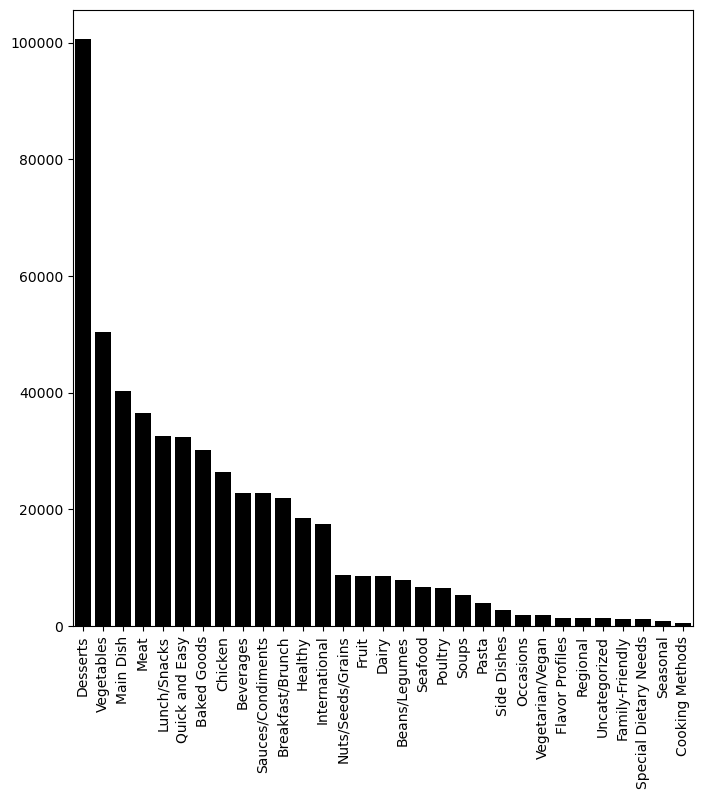

In [14]:
plt.figure(figsize=(8,8))
sns.barplot(x=recipes['RecipeCategory'].value_counts().index,y=recipes['RecipeCategory'].value_counts().values,color='black')
plt.xticks(rotation=90);

## Ratings

<Axes: xlabel='CorrectAggregatedRating', ylabel='Count'>

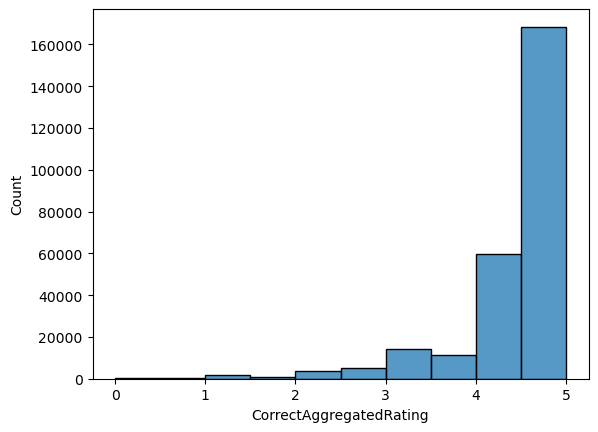

In [47]:
sns.histplot(recipes['CorrectAggregatedRating'],bins=10)

#### All-time most reviewed recipes

In [91]:
top_reviews = recipes['ReviewCount'].sort_values(ascending=False).dropna()
top_reviews

41924     3063.0
1436      2273.0
23725     1692.0
84057     1657.0
35377     1586.0
           ...  
213893       1.0
213890       1.0
213889       1.0
213883       1.0
522431       1.0
Name: ReviewCount, Length: 275025, dtype: float64

In [92]:
top_reviews.head(20)

41924     3063.0
1436      2273.0
23725     1692.0
84057     1657.0
35377     1586.0
32174     1410.0
62823     1409.0
50172     1384.0
19387     1326.0
28625     1284.0
405555    1256.0
22241     1150.0
64670     1068.0
68812     1040.0
64455      973.0
30311      940.0
77165      908.0
22426      896.0
80577      848.0
24640      835.0
Name: ReviewCount, dtype: float64

<Axes: >

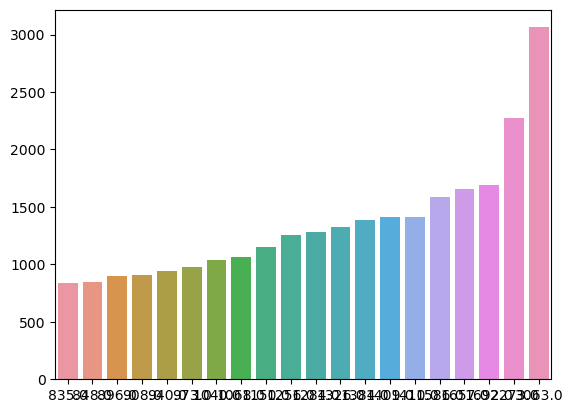

In [98]:
sns.barplot(x = top_reviews.head(20).values, y= top_reviews.head(20).head(20).values)

In [102]:
top_review_recipe = recipes.loc[41924]
top_review_recipe

RecipeId                                                                45809.0
AuthorId                                                                  58278
Description                   I searched and finally found this recipe on th...
RecipeCategory                                                          Chicken
Keywords                      [Chicken, Poultry, Meat, Chinese, Asian, High ...
RecipeIngredientQuantities     [2, 1 -2, 1, 1⁄4, 3⁄4, 1⁄4, 1⁄3, 2, 1, 1⁄2, 1⁄3]
RecipeIngredientParts         [boneless chicken breasts, olive oil, garlic c...
ReviewCount                                                              3063.0
Calories                                                                  521.4
FatContent                                                                 24.5
SaturatedFatContent                                                         6.5
CholesterolContent                                                        145.3
SodiumContent                           

In [103]:
top_review_recipe['url']

'https://www.food.com/recipe/Bourbon-Chicken-45809'

## Authors

In [57]:
recipes['AuthorId'].value_counts().head(20)

37779      7742
283251     6375
89831      3926
57042      3435
883095     3399
37449      3301
1533       3032
1072593    2841
287420     2260
6357       2088
232669     1984
58104      1982
305531     1868
64642      1841
169430     1623
17803      1609
80353      1552
4470       1523
327115     1517
118840     1512
Name: AuthorId, dtype: int64

<Axes: >

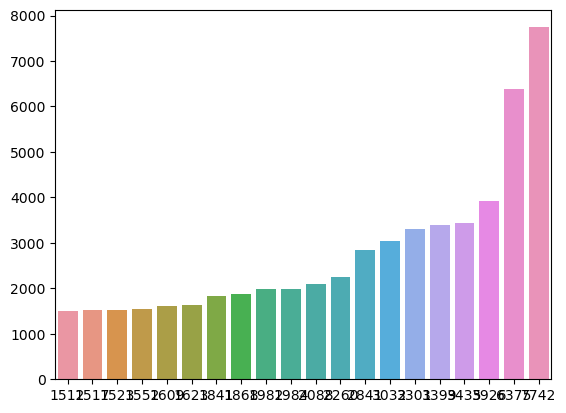

In [69]:
sns.barplot(x = recipes['AuthorId'].value_counts().head(20).values, y= recipes['AuthorId'].value_counts().head(20).values)

In [71]:
top_author = recipes[recipes['AuthorId'] ==37779]
top_author

,RecipeId,AuthorId,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions,url,YearPublished,MonthPublished,DayPublished,HourPublished,TotalMinutes,CorrectAggregatedRating
21483,24919.0,37779,This dish has become a family holiday favorite...,Nuts/Seeds/Grains,"[Vegetable, Thanksgiving, < 60 Mins, Oven, Easy]","[1, 1, 1, 1, 1]","[frozen broccoli cuts, water chestnuts]",18.0,298.5,16.6,8.8,48.6,1488.7,27.6,4.0,7.9,11.4,NaN,None,"[Cook rice according to package directions., C...",https://www.food.com/recipe/Broccoli-and-Wild-...,2002,4,11,10,60,4.28
21637,25079.0,37779,Make and share this Chicken Acapulco recipe fr...,Chicken,"[Poultry, Meat, Southwestern U.S., Mexican, Po...","[1, 1, 3, 1, 1, 1, 1, 1⁄2, 1⁄4, 1⁄8, 10, 1, 1,...","[onion, butter, margarine, sour cream, green c...",7.0,659.3,33.4,14.6,107.9,1540.9,55.3,3.4,5.8,33.9,6.0,None,"[In a large saucepan, cook onion in butter unt...",https://www.food.com/recipe/Chicken-Acapulco-2...,2002,4,13,15,75,4.71
21765,25208.0,37779,Make and share this Raspberry Hot Chocolate re...,Beverages,"[Raspberries, Berries, Fruit, < 15 Mins, Easy]","[1 1⁄2, 1 1⁄2, None]","[Creme de Cacao, Chambord raspberry liquor]",7.0,131.0,0.1,0.1,0.0,3.4,13.7,0.0,13.7,0.0,1.0,None,[Make hot chocolate according to package direc...,https://www.food.com/recipe/Raspberry-Hot-Choc...,2002,4,14,22,10,5.00
21794,25237.0,37779,Make and share this Hot Bacon Appetizers recip...,Meat,"[Meat, < 60 Mins, Easy]","[1⁄2, 3⁄4, 1⁄4, 2, 50]","[bacon, process American cheese, butter, marga...",2.0,40.4,3.8,1.8,7.7,100.3,0.3,0.0,0.2,1.2,NaN,50 appetizers,"[Mix together first 4 ingredients., Spread eve...",https://www.food.com/recipe/Hot-Bacon-Appetize...,2002,4,14,22,40,5.00
21803,25246.0,37779,Southern Living; This is one of my family's fa...,Lunch/Snacks,"[Tuna, < 60 Mins, Easy]","[1, 1⁄4, 1⁄4, 1⁄4, 1⁄4, 8, 2, 1⁄2, 1⁄4]","[tuna, celery, onion, mayonnaise, eggs, milk, ...",5.0,376.1,18.8,9.7,143.9,553.5,33.4,1.6,7.3,18.2,4.0,None,"[Mix together tuna, celery, onion, pickle reli...",https://www.food.com/recipe/French-Toast-Tuna-...,2002,4,14,22,40,4.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496730,514951.0,37779,Make and share this Individual Chicken Cassero...,Chicken,"[Poultry, Meat, < 60 Mins, Oven]","[1, 1⁄2, 1, 1, 2, 2, 1⁄2, 1, 1⁄2, None, None, ...","[olive oil, onion, garlic clove, boneless skin...",NaN,239.6,18.3,9.8,66.9,198.5,10.3,1.8,1.5,8.4,6.0,None,[Preheat oven to 400 degrees and prepare 6 jum...,https://www.food.com/recipe/Individual-Chicken...,2014,3,28,12,60,NaN
498723,516969.0,37779,Make and share this Gingery Beef Broth With So...,International,"[Low Cholesterol, Healthy, < 60 Mins, Stove Top]","[2, 2, None, 1, None, 1, 2, 1⁄4, 5, 1, None]","[green onions, beef broth, fresh ginger, garli...",NaN,114.9,2.7,0.3,0.0,552.2,19.4,0.4,0.6,5.2,6.0,None,"[Thinly slice the green onions, reserving the ...",https://www.food.com/recipe/Gingery-Beef-Broth...,2014,6,30,10,60,NaN
502783,521057.0,37779,Make and share this Fresh Strawberry Cake With...,Desserts,"[Strawberry, Berries, Fruit, Oven, < 4 Hours]","[1, 1, 1⁄2, 1⁄2, 2, 1 1⁄2, 1 1⁄2, 3⁄4, 1⁄4, 6,...","[egg, sour cream, lemon zest, pure vanilla ext...",1.0,381.9,17.6,10.4,72.1,268.1,52.2,1.1,35.3,4.8,9.0,None,"[Preheat oven to 350 degrees., Grease an 8-inc...",https://www.food.com/recipe/Fresh-Strawberry-C...,2015,2,15,13,80,5.00
502784,521058.0,37779,Make and share this Pasta and Bean Soup With F...,Beans/Legumes,"[Oven, < 4 Hours]","[3, 2, 2, 4, 1, 1, 6, 1⁄4, 2, None, None, 8, 6...","[olive oil, yellow onions, garlic, pancetta, w...",NaN,719.3,26.2,12.1,62.6,1664.0,86.4,7.4,6.1,35.1,6.0,None,"[Preheat the oven to 350 degrees., In a large,...",https://www.food.com/recipe/Pasta-and

In [75]:
top_author.describe().loc[['count','mean','min','max']]

,RecipeId,AuthorId,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,YearPublished,MonthPublished,DayPublished,HourPublished,TotalMinutes,CorrectAggregatedRating
count,7742.000000,7742.0,3098.00000,7742.000000,7742.000000,7742.00000,7742.000000,7742.000000,7742.000000,7742.000000,7742.000000,7742.000000,5465.000000,7742.00000,7742.000000,7742.000000,7742.000000,7742.00000,3015.000000
mean,262443.011237,37779.0,6.20949,483.892302,23.249806,9.33419,95.994084,700.318768,48.812942,3.811883,20.441578,19.146203,6.038792,2007.31891,6.325756,15.592741,14.578662,81.13782,4.524862
min,24919.000000,37779.0,1.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2002.00000,1.000000,1.000000,0.000000,0.00000,0.500000
max,521059.000000,37779.0,612.00000,38733.800000,2817.500000,998.70000,11857.000000,84192.200000,1724.800000,102.800000,1247.400000,3278.300000,84.000000,2015.00000,12.000000,31.000000,23.000000,585.00000,5.000000


In [85]:
top_author['ReviewCount'].sort_values(ascending=False).dropna()

25250     612.0
22316     309.0
22278     263.0
59446     248.0
36733     223.0
          ...  
140496      1.0
140495      1.0
140494      1.0
140278      1.0
502783      1.0
Name: ReviewCount, Length: 3098, dtype: float64

In [86]:
recipes.loc[25250]

RecipeId                                                                28768.0
AuthorId                                                                  37779
Description                   My family's favorite. This is a very meaty las...
RecipeCategory                                                            Dairy
Keywords                           [Meat, European, Weeknight, Oven, < 4 Hours]
RecipeIngredientQuantities    [1 1⁄2, 1⁄2, 1, 2 -3, 1, 1, 1, 1, 1, 2, 12, 24...
RecipeIngredientParts         [lean ground beef, Italian sausage, onion, gar...
ReviewCount                                                               612.0
Calories                                                                  540.5
FatContent                                                                 29.6
SaturatedFatContent                                                        15.1
CholesterolContent                                                        142.3
SodiumContent                           

In [87]:
recipes.loc[25250]['url']

'https://www.food.com/recipe/Absolute-Best-Ever-Lasagna-28768'

## Correlation Between Numerical Columns

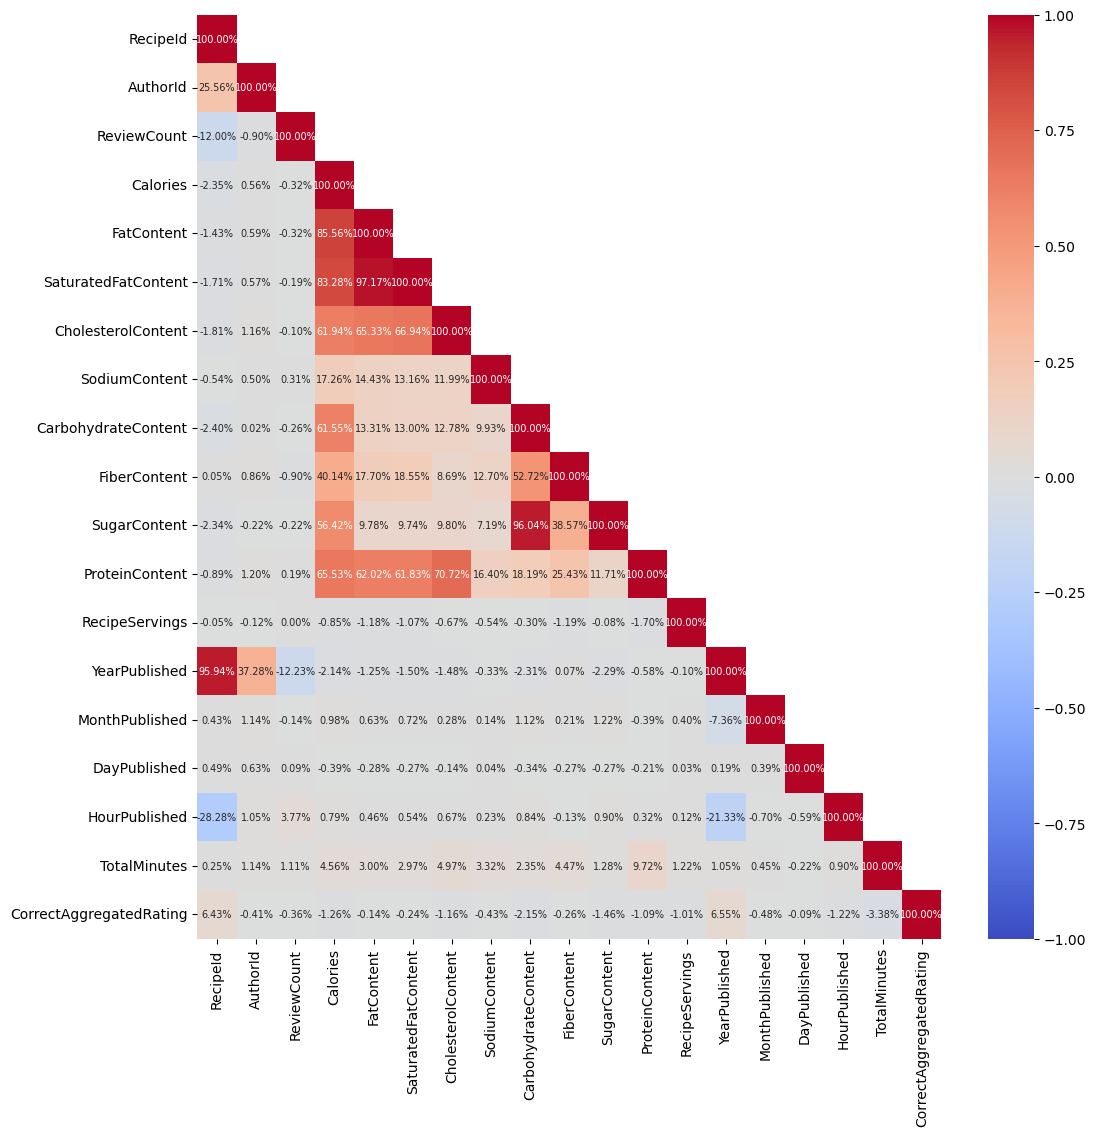

In [16]:
matrix = recipes.corr(numeric_only=True)

plt.figure(figsize=(12,12))

mask = ~np.tri(matrix.shape[0], k=0, dtype=bool)
sns.heatmap(matrix,cmap='coolwarm',mask=mask,annot=True,fmt=".2%",annot_kws={"fontsize": 7},vmax=1, vmin=-1, center=0)
plt.show()

## Ingredients

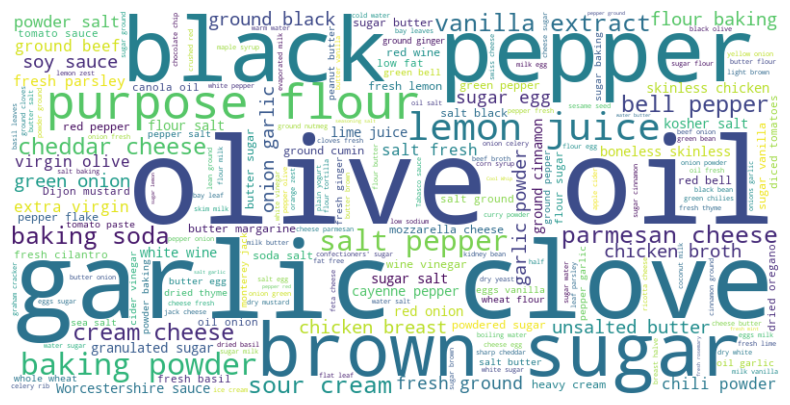

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Create an empty string to concatenate all ingredient lists
all_ingredients = ""

# Iterate over each row in the 'RecipeIngredientParts' column
for ingredients_list in recipes['RecipeIngredientParts']:
    # Join the ingredients list into a single string
    ingredients_string = ' '.join(ingredients_list)
    # Concatenate the string with all ingredients
    all_ingredients += " " + ingredients_string

# Generate the word cloud from all ingredients
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_ingredients)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Time Series Analysis

In [28]:
recipes.groupby('YearPublished').mean()

C:\Users\mathe\AppData\Local\Temp\ipykernel_28500\660384803.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  recipes.groupby('YearPublished').mean()


,RecipeId,AuthorId,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,MonthPublished,DayPublished,HourPublished,TotalMinutes,CorrectAggregatedRating
YearPublished,,,,,,,,,,,,,,,,,,
1999,3037.128135,1.008519e+04,10.983254,880.550900,43.142939,17.410469,145.013304,1165.487541,99.904798,6.260224,55.058479,25.707525,8.089462,9.944111,14.001091,9.922846,43.592421,4.203819
2000,7457.297985,7.236553e+04,6.491111,468.308696,25.592153,10.119300,91.262725,827.204401,43.154772,3.232078,19.567922,16.710657,7.472050,3.284730,9.861612,18.034995,50.125133,4.231361
2001,12567.067669,1.618375e+04,11.759431,505.805406,24.683433,9.908361,85.765764,696.161123,55.313599,3.918188,27.650259,16.328208,7.661857,9.199507,16.187062,12.666191,66.386311,4.262145
2002,33103.037281,2.975290e+04,10.577156,562.031461,28.285984,11.374735,98.625869,915.739065,59.708458,4.005500,29.565236,18.477200,7.904882,6.540640,16.107900,17.232561,63.733146,4.371953
2003,64802.487948,5.665568e+04,8.212563,588.607470,30.249193,12.026198,103.842704,925.114773,61.606602,4.204406,30.258729,19.004773,9.398010,6.315641,14.272709,19.956387,65.790651,4.413572
2004,93688.826988,8.888411e+04,7.406793,565.165079,28.960200,11.369284,100.713876,809.094896,58.383227,3.969932,28.254946,18.921285,8.677349,6.226486,15.514015,19.606385,67.613655,4.417646
2005,128577.789474,1.327281e+05,5.831315,499.426584,25.458663,10.046481,90.175291,790.849741,51.164404,3.728055,23.783698,17.394966,8.722635,6.664333,16.038047,16.323570,64.081776,4.433521
2006,176316.148729,1.961946e+05,4.354864,475.979439,23.708695,9.371003,85.398955,703.930995,49.178663,3.693137,22.684120,17.212200,8.270980,6.636931,16.138458,16.850649,64.167072,4.426852
2007,238877.957495,3.111389e+05,3.731351,458.227892,23.809528,9.183464,82.799506,713.606082,44.178658,3.568970,18.792623,17.142535,9.085398,6.598541,15.920432,16.323172,61.826192,4.432571


C:\Users\mathe\AppData\Local\Temp\ipykernel_28500\2549646672.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  recipes.groupby('YearPublished').mean()[['FatContent']].plot()


<Axes: xlabel='YearPublished'>

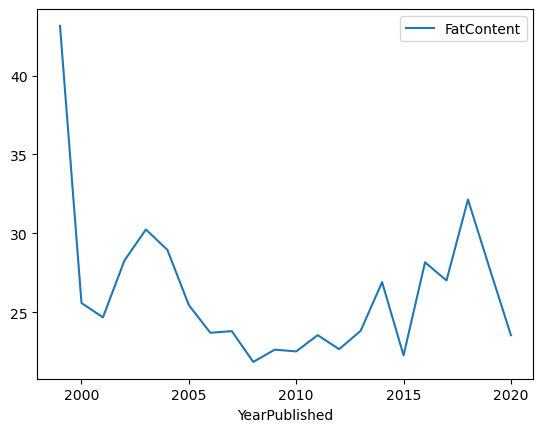

In [31]:
recipes.groupby('YearPublished').mean()[['FatContent']].plot()

In [34]:
recipes.groupby('YearPublished').count()

,RecipeId,AuthorId,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions,url,MonthPublished,DayPublished,HourPublished,TotalMinutes,CorrectAggregatedRating
YearPublished,,,,,,,,,,,,,,,,,,,,,,,,,,
1999,3668,3668,3668,3668,3668,3668,3668,2747,3668,3668,3668,3668,3668,3668,3668,3668,3668,2325,1256,3668,3668,3668,3668,3668,3668,2592
2000,1886,1886,1886,1886,1886,1886,1886,1350,1886,1886,1886,1886,1886,1886,1886,1886,1886,1771,366,1886,1886,1886,1886,1886,1886,1286
2001,7714,7714,7714,7714,7714,7714,7714,6256,7714,7714,7714,7714,7714,7714,7714,7714,7714,4782,2431,7714,7714,7714,7714,7714,7714,6046
2002,32456,32456,32456,32456,32456,32456,32456,25390,32456,32456,32456,32456,32456,32456,32456,32456,32456,18640,10257,32456,32456,32456,32456,32456,32456,24763
2003,29372,29372,29372,29372,29372,29372,29372,22478,29372,29372,29372,29372,29372,29372,29372,29372,29372,15781,8750,29372,29372,29372,29372,29372,29372,21994
2004,26686,26686,26686,26686,26686,26686,26686,19607,26686,26686,26686,26686,26686,26686,26686,26686,26686,16944,6436,26686,26686,26686,26686,26686,26686,19193
2005,41002,41002,41002,41002,41002,41002,41002,27916,41002,41002,41002,41002,41002,41002,41002,41002,41002,25836,10237,41002,41002,41002,41002,41002,41002,27126
2006,51409,51409,51409,51409,51409,51409,51409,31753,51409,51409,51409,51409,51409,51409,51409,51409,51409,32674,12431,51409,51409,51409,51409,51409,51409,30829
2007,70204,70204,70204,70204,70204,70204,70204,40190,70204,70204,70204,70204,70204,70204,70204,70204,70204,46371,15795,70204,70204,70204,70204,70204,70204,39040


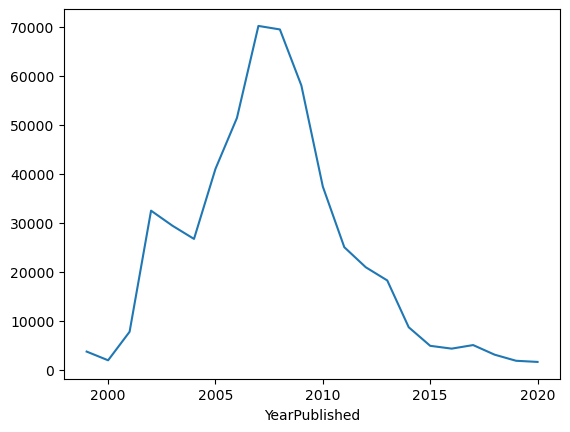

In [37]:
recipes.groupby('YearPublished').count()['RecipeId'].plot();

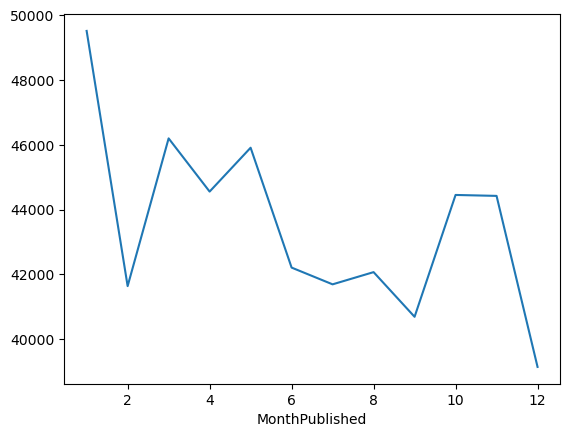

In [39]:
recipes.groupby('MonthPublished').count()['RecipeId'].plot();

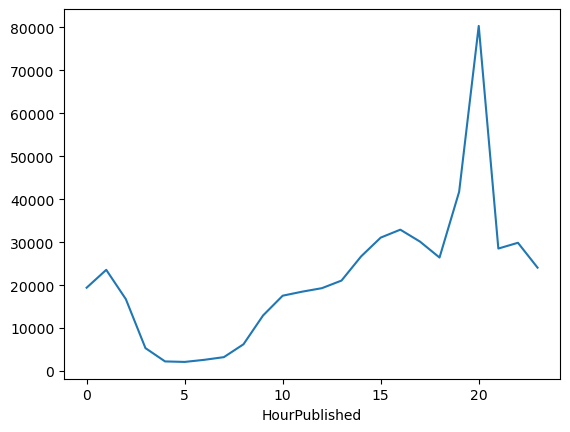

In [41]:
recipes.groupby('HourPublished').count()['RecipeId'].plot();

<Axes: xlabel='YearPublished'>

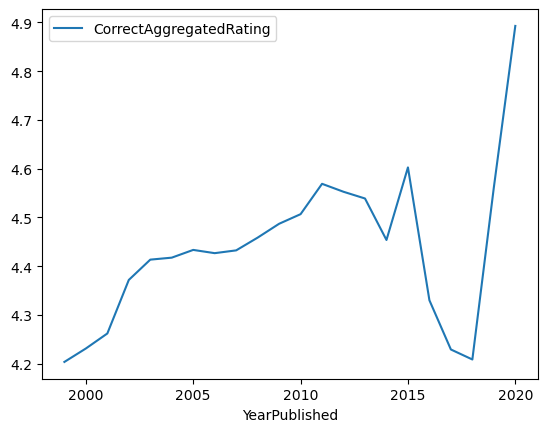

In [51]:
recipes[['YearPublished','CorrectAggregatedRating']].groupby('YearPublished').mean().plot()

## Misclaneous

Let's check the correlation between receipe_servings and other variables.

In [ ]:
matrix = recipes.corr(numeric_only=True)

plt.figure(figsize=(12,12))

mask = ~np.tri(matrix.shape[0], k=0, dtype=bool)
sns.heatmap(matrix,cmap='coolwarm',mask=mask,annot=True,fmt=".2%",annot_kws={"fontsize": 7},vmax=1, vmin=-1, center=0)
plt.show()

Not many strong correlations there. But let's take a look at some of the top correlations anyway:

- The strongest is `TotalMinutes` which indicates the total cooking time in minutes, with the correlation of 1.22%. This makes sense: recipes with more ingredients usually need more cooking time.
- The second strongest one is `FiberContent` with a correlation of -1.19%. Foods with less fiber, such as refined grains or processed foods, often tend to be less expensive compared to high-fiber foods. This affordability can make them more accessible to a larger population, especially in regions or communities with limited economic resources.
- The third strongest one is `FatContent`: -1.18%.  In some regions or communities, foods with lower fat content might be more affordable and readily available compared to higher-fat alternatives. This accessibility makes them a viable choice for a larger population, particularly in areas with limited resources or where higher-fat foods may be less accessible due to cost or availability.